In [2]:
from datetime import datetime
import os
from urllib.request import urlopen
import glob
import zipfile
import pandas as pd 

jax_dir_path = '/home/hasitha/PycharmProjects/DSS-Framework/jupyter_notebooks/jaxa_data'

In [3]:
date_str = '2019-10-11 02:00:00'
data_date = datetime.strptime(date_str,'%Y-%m-%d %H:%M:%S')
login = 'rainmap:Niskur+1404'
jaxa_url = 'ftp://' + login + '@hokusai.eorc.jaxa.jp/now/txt/05_AsiaSS/gsmap_now.YYYYMMDD.HH00_HH59.05_AsiaSS.csv.zip'

In [4]:
date_dic = {'YYYY':data_date.strftime('%Y'),'MM':data_date.strftime('%m'),'DD':data_date.strftime('%d'),'HH':data_date.strftime('%H')}
for k,v in list(date_dic.items()):
    jaxa_url = jaxa_url.replace(k, v)

In [5]:
def _download_file(url, dest):
    f = urlopen(url)
    with open(dest, "wb") as local_file:
        local_file.write(f.read())

In [6]:
dir_path = os.path.join(os.getcwd(), 'jaxa_data')
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
jaxa_zip_file = os.path.join(dir_path, os.path.basename(jaxa_url))


In [7]:
def download_jaxa_data(date_str, dir_path=None):
    data_date = datetime.strptime(date_str,'%Y-%m-%d %H:%M:%S')
    login = 'rainmap:Niskur+1404'
    jaxa_url = 'ftp://' + login + '@hokusai.eorc.jaxa.jp/now/txt/05_AsiaSS/gsmap_now.YYYYMMDD.HH00_HH59.05_AsiaSS.csv.zip'
    date_dic = {'YYYY':data_date.strftime('%Y'),'MM':data_date.strftime('%m'),'DD':data_date.strftime('%d'),'HH':data_date.strftime('%H')}
    for k,v in list(date_dic.items()):
        jaxa_url = jaxa_url.replace(k, v)
    if dir_path is not None:
        data_path = os.path.join(dir_path, 'jaxa_data')
    else:
        data_path = os.path.join(os.getcwd(), 'jaxa_data')
    if not os.path.exists(data_path):
        os.makedirs(data_path)
    jaxa_zip_file = os.path.join(data_path, os.path.basename(jaxa_url))
    _download_file(jaxa_url, jaxa_zip_file)
    return jaxa_zip_file

In [8]:
def list_files(path, ext):
    files = [f for f in glob.glob(path + "**/*.{}".format(ext), recursive=True)]
    for f in files:
        print(f)

In [9]:
list_files(jax_dir_path,'zip')

/home/hasitha/PycharmProjects/DSS-Framework/jupyter_notebooks/jaxa_data/gsmap_now.20191011.0200_0259.05_AsiaSS.csv.zip
/home/hasitha/PycharmProjects/DSS-Framework/jupyter_notebooks/jaxa_data/gsmap_now.20191011.0300_0359.05_AsiaSS.csv.zip


In [10]:
def unzip_file(src,dest=None):
    with zipfile.ZipFile(src, 'r') as zip_ref:
        if dest is not None:
            zip_ref.extractall(dest)
        else:
            zip_ref.extractall(jax_dir_path)

In [11]:
unzip_file('/home/hasitha/PycharmProjects/DSS-Framework/jupyter_notebooks/jaxa_data/gsmap_now.20191011.0300_0359.05_AsiaSS.csv.zip',jax_dir_path)

In [12]:
list_files(jax_dir_path,'csv')

/home/hasitha/PycharmProjects/DSS-Framework/jupyter_notebooks/jaxa_data/gsmap_now.20191011.0300_0359.05_AsiaSS.csv


In [13]:
df = pd.read_csv('/home/hasitha/PycharmProjects/DSS-Framework/jupyter_notebooks/jaxa_data/gsmap_now.20191011.0300_0359.05_AsiaSS.csv')
df

,Lat,Lon,RainRate,Gauge-calibratedRain
0,39.95,60.05,0.0,0.0
1,39.85,60.05,0.0,0.0
2,39.75,60.05,0.0,0.0
3,39.65,60.05,0.0,0.0
4,39.55,60.05,0.0,0.0
...,...,...,...,...
115825,5.35,92.95,0.0,0.0
115826,5.25,92.95,0.0,0.0
115827,5.15,92.95,0.0,0.0
115828,5.05,92.95,0.0,0.0


In [14]:
list(df.columns.values)

[' Lat', '  Lon', '  RainRate', '  Gauge-calibratedRain']

In [15]:
df.drop('  Gauge-calibratedRain', axis=1, inplace=True)

In [16]:
df

,Lat,Lon,RainRate
0,39.95,60.05,0.0
1,39.85,60.05,0.0
2,39.75,60.05,0.0
3,39.65,60.05,0.0
4,39.55,60.05,0.0
...,...,...,...
115825,5.35,92.95,0.0
115826,5.25,92.95,0.0
115827,5.15,92.95,0.0
115828,5.05,92.95,0.0


In [17]:
df.rename(columns={' Lat': 'Lat', '  Lon': 'Lon', '  RainRate': 'RainRate'}, inplace=True)

In [18]:
list(df.columns.values)

['Lat', 'Lon', 'RainRate']

In [19]:
df=df[['Lon', 'Lat', 'RainRate']]

In [20]:
df

,Lon,Lat,RainRate
0,60.05,39.95,0.0
1,60.05,39.85,0.0
2,60.05,39.75,0.0
3,60.05,39.65,0.0
4,60.05,39.55,0.0
...,...,...,...
115825,92.95,5.35,0.0
115826,92.95,5.25,0.0
115827,92.95,5.15,0.0
115828,92.95,5.05,0.0


In [21]:
d03_grid={'lon_min':79.521461,'lon_max':82.189919,'lat_min':5.722969,'lat_max':10.064255}

In [22]:
d03_df=df[(df['Lon']>=d03_grid['lon_min']) & (df['Lon']<=d03_grid['lon_max']) & (df['Lat']>=d03_grid['lat_min']) & (df['Lat']<=d03_grid['lat_max'])]

In [23]:
d03_df

,Lon,Lat,RainRate
68744,79.55,10.05,0.00
68745,79.55,9.95,0.00
68746,79.55,9.85,0.00
68747,79.55,9.75,0.00
68748,79.55,9.65,0.00
...,...,...,...
77909,82.15,6.15,4.10
77910,82.15,6.05,3.94
77911,82.15,5.95,4.26
77912,82.15,5.85,0.00


In [24]:
d03_df = d03_df.reset_index(drop=True)

In [25]:
d03_df

,Lon,Lat,RainRate
0,79.55,10.05,0.00
1,79.55,9.95,0.00
2,79.55,9.85,0.00
3,79.55,9.75,0.00
4,79.55,9.65,0.00
...,...,...,...
1183,82.15,6.15,4.10
1184,82.15,6.05,3.94
1185,82.15,5.95,4.26
1186,82.15,5.85,0.00


In [26]:
import matplotlib.pyplot as plt

d03_df.plot(kind="scatter", x="Lon", y="Lat", alpha=0.4)
plt.show()

<Figure size 640x480 with 1 Axes>

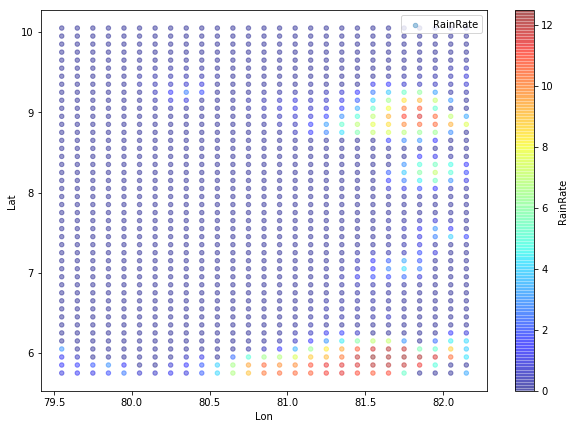

In [30]:
d03_df.plot(kind="scatter", x="Lon", y="Lat", label="RainRate",
    c="RainRate", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)
plt.legend()
plt.show()

In [33]:
import matplotlib.image as mpimg
lanka_img=mpimg.imread('/home/hasitha/PycharmProjects/DSS-Framework/jupyter_notebooks/jaxa_data/map.png')

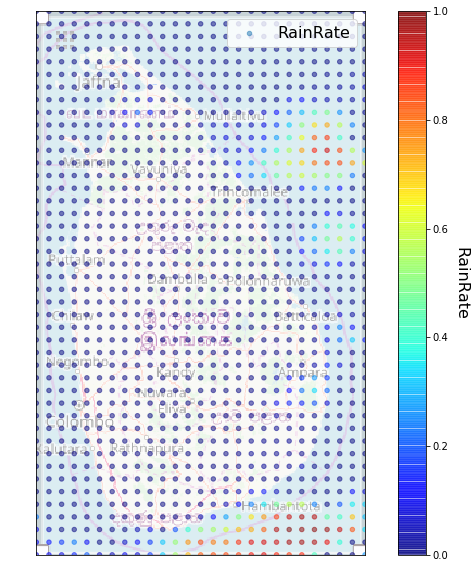

In [85]:
ax = d03_df.plot(kind="scatter", x="Lon", y="Lat", figsize=(12,10), 
                 label="RainRate", c="RainRate",cmap=plt.get_cmap("jet"),
                 colorbar=False, alpha=0.5)
plt.imshow(lanka_img, extent=[79.55,82.15,5.75,10.05], alpha=0.4)
plt.ylabel("", fontsize=14)
plt.xlabel("", fontsize=14)
plt.tick_params(colors='w')

cbar = plt.colorbar()
cbar.set_cmap("jet")
cbar.solids.set_edgecolor("face")
cbar.solids.set_cmap("jet")
cbar.set_label('RainRate', fontsize=16, alpha=1, 
               rotation=270, labelpad=20)

plt.legend(fontsize=16)
plt.show()
#plt.savefig('/home/hasitha/PycharmProjects/DSS-Framework/jupyter_notebooks/jaxa_data/output.png')

In [86]:
def format_jaxa_df(df,d03_grid={'lon_min':79.521461,'lon_max':82.189919,'lat_min':5.722969,'lat_max':10.064255}):
    d03_df = df[(df['Lon']>=d03_grid['lon_min']) & (df['Lon']<=d03_grid['lon_max']) & (df['Lat']>=d03_grid['lat_min']) & (df['Lat']<=d03_grid['lat_max'])]
    d03_df = d03_df.reset_index(drop=True)
    return d03_df

In [88]:
def create_png(d03_df, base_image_path='/home/hasitha/PycharmProjects/DSS-Framework/jupyter_notebooks/jaxa_data/map.png',
              output_image_path='/home/hasitha/PycharmProjects/DSS-Framework/jupyter_notebooks/jaxa_data/output.png',
              image_extent=[79.55,82.15,5.75,10.05]):
    lanka_img=mpimg.imread(base_image_path)
    ax = d03_df.plot(kind="scatter", x="Lon", y="Lat", figsize=(12,10), 
                 label="RainRate", c="RainRate",cmap=plt.get_cmap("jet"),
                 colorbar=False, alpha=0.5)
    plt.imshow(lanka_img, extent=image_extent, alpha=0.4)
    plt.ylabel("", fontsize=14)
    plt.xlabel("", fontsize=14)
    plt.tick_params(colors='w')

    cbar = plt.colorbar()
    cbar.set_cmap("jet")
    cbar.solids.set_edgecolor("face")
    cbar.solids.set_cmap("jet")
    cbar.set_label('RainRate', fontsize=16, alpha=1, 
               rotation=270, labelpad=20)

    plt.legend(fontsize=16)
    plt.savefig(output_image_path)